In [2]:
import pandas as pd
import datetime
import numpy as np
from scipy import stats

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv("merge_2.csv")
df.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
df.head()

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday,1
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday,1
2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday,1
3,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,12.0,A,03/13/2018,Cycle Inspection / Initial Inspection,2018-03-13,469 FLATBUSH AVENUE,snow,Tuesday,1
4,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,10.0,A,10/06/2017,Cycle Inspection / Re-inspection,2017-10-06,469 FLATBUSH AVENUE,rain,Friday,1


## Question 1:
### Does bad weather lead to more infractions during a restaurant inspection in NYC?
Ho: Precipitation has no effect on inpection score.

Ha: Precipitation causes the inspection score to increase. 


In [5]:
#create a new dataframe with score and weather_binary, 1 = precipitation, 0 = no precipitation
weather_score = df[['SCORE', 'weather_binary']]
#seperate scores on precipitation days and no precipitation days into numpy arrays
precip = np.array(weather_score['SCORE'][weather_score['weather_binary']==1])
no_precip = np.array(weather_score['SCORE'][weather_score['weather_binary']==0])

In [6]:
print("The mean score on days with precipitation is ", round(precip.mean(), 2))
print("With a standard deviation of ", round(precip.std(), 3))

The mean score on days with precipitation is  15.6
With a standard deviation of  11.977


In [7]:
print("The mean score on days without precipitation is ", round(no_precip.mean(), 2))
print("With a standard deviation of ", round(no_precip.std(), 3))

The mean score on days without precipitation is  15.48
With a standard deviation of  11.66


### The data appears to be heavily skewed to the right

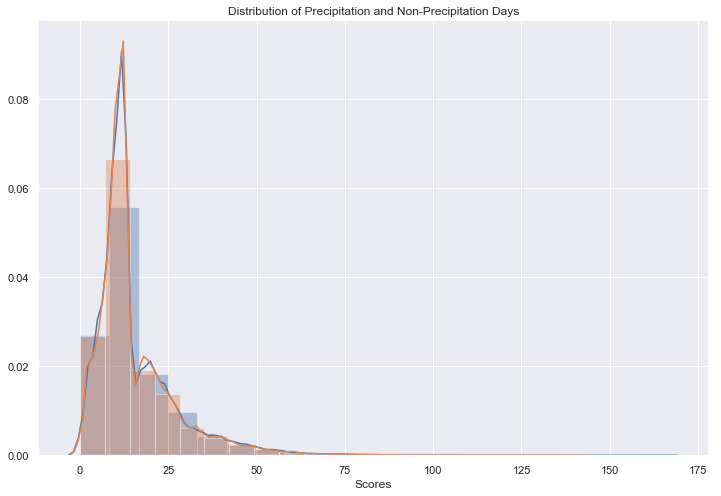

In [11]:
sns.set(color_codes=True)
plt.figure(figsize=(12, 8))
sns.distplot(precip, bins=20) #blue line
sns.distplot(no_precip, bins=20); #orange line
plt.xlabel('Scores')
plt.title('Distribution of Precipitation and Non-Precipitation Days');

In [123]:
t_stat_weather, p_value_weather = stats.ttest_ind(precip, no_precip, equal_var=False)
print("The t-stat is {} and the the p value is {}.".format(round(t_stat_weather, 3), round(p_value_weather, 3)))      

The t-stat is 1.414 and the the p value is 0.157.


In [146]:
#calculating critical value
deg_weather = len(precip) + len(no_precip) - 2
t_critical_weather = np.round(stats.t.ppf(1 - 0.05, df=deg_week),4)
t_critical_weather

1.6449

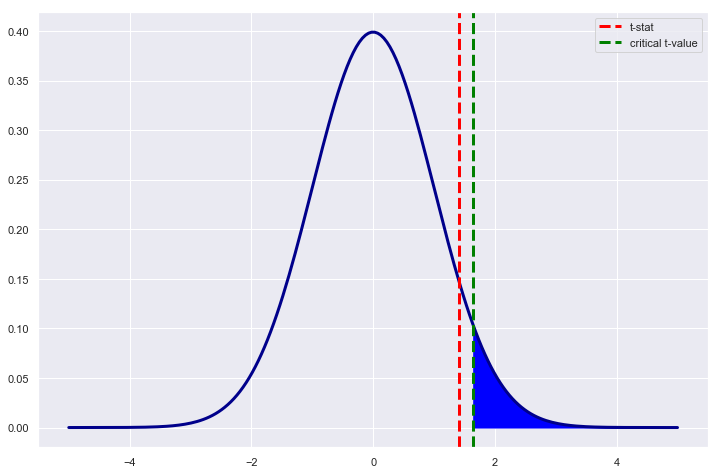

In [150]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg_weather, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat_weather, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(t_critical_weather,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,t_critical_weather,where = xs > t_critical_weather, color = 'blue')

ax.legend()
plt.show()

In [158]:
print("The critical value of {} is larger than the t-statistic of {}, with a p-value of {}. Therefore we fail to reject the null hypothesis.".format(t_critical_weather, round(t_stat_weather, 3), round(p_value_weather,3)))


The critical value of 1.6449 is larger than the t-statistic of 1.414, with a p-value of 0.157. Therefore we fail to reject the null hypothesis.


### I may have failed to reject the null hypothesis, however I would like to point out these 4 outliers of shame.

In [145]:
df[df['SCORE'] > 150] #outliers of shame... and it's raining 

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
58163,50046375,ICHIBA RAMEN,MANHATTAN,10003.0,2127772495,Japanese,166.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-04-25,125 UNIVERSITY PL,rain,Thursday,1
60578,50050373,MARGARITA ISLAND,BROOKLYN,11224.0,7184491284,"Bottled beverages, including water, sodas, jui...",151.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2017-07-20,1105 BOWERY ST,rain,Thursday,1
68136,50061507,BICKLES 2 GO,BRONX,10451.0,3479634184,Caribbean,164.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-08,647 COURTLANDT AVE,rain,Wednesday,1
78642,50075349,KAY'S BOUTIQUE CAFE,MANHATTAN,10012.0,3479347940,CafÃ©/Coffee/Tea,155.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2018-04-25,240 MULBERRY ST,rain,Wednesday,1


## Question 2:
#### Are NYC resaurants more likely to get to be cited for a greater number of infractions at the beginning of the week?
Ho: Day of week has no effect of inspection score.

Ha: Higher inspection scores are given at the beginning of the week. 

In [61]:
#create new data frame with score and day of the week
days_df = df[['SCORE','DAY OF WEEK']]
#seperate out and create 2 more data frames. One for Monday/Tuesday, one for Thursday/Friday
mon = days_df[days_df['DAY OF WEEK'] == 'Monday']
tues = days_df[days_df['DAY OF WEEK'] == 'Tuesday']
thurs = days_df[days_df['DAY OF WEEK'] == 'Thursday']
fri = days_df[days_df['DAY OF WEEK'] == 'Friday']

In [109]:
mon_tues = pd.concat([mon, tues])
thurs_fri = pd.concat([thurs, fri])

In [111]:
#turn the scores in each data frame into a numpy array 
montue = np.array(mon_tues['SCORE'])
thurfri = np.array(thurs_fri['SCORE'])

In [115]:
print("The mean inspection score for Monday's and Tuesday's is ", round(montue.mean(), 3))
print("With a standard deviation of ", round(montue.std(), 3))

The mean inspection score for Monday's and Tuesday's is  15.564
With a standard deviation of  11.671


In [116]:
print("The mean inspection score for Thursday's and Friday's is ", round(thurfri.mean(), 3))
print("With a standard deviation of ", round(thurfri.std(), 3))

The mean inspection score for Thursday's and Friday's is  15.356
With a standard deviation of  11.794


In [1]:
plt.figure(figsize=(12, 8))
sns.distplot(montue, bins=20) #blue line
sns.distplot(thurfri, bins=20); #orange line


NameError: name 'plt' is not defined

In [134]:
t_stat_week, p_value_week = stats.ttest_ind(montue, thurfri, equal_var=False)
print("The t-stat is {} and the the p value is {}.".format(round(t_stat_day, 3), round(p_value_day, 4)))  

The t-stat is 2.213 and the the p value is 0.0269.


In [142]:
#calculating critical value
deg_week = len(montue) + len(thurfri) - 2
t_critical_week = np.round(stats.t.ppf(1 - 0.05, df=deg_week),4)
t_critical_week

1.6449

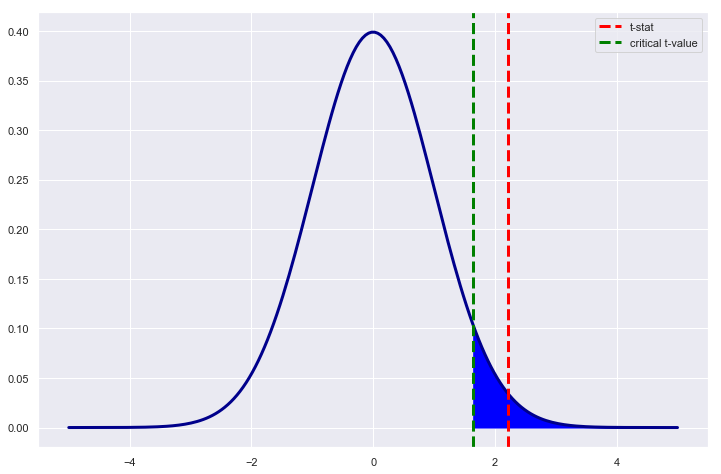

In [151]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg_week, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat_week, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(t_critical_week,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,t_critical_week,where = xs > t_critical_week, color = 'blue')

ax.legend()
plt.show()

In [153]:
print("The critical value of {} is less than the t-statistic of {}, with a p-value of {}. Therefore we are able to reject the null hypothesis.".format(t_critical_week, t_stat_week, p_value_week ))

The critical value of 1.6449 is less than the t-statistic of 2.2132753769214997, with a p-value of 0.026882281413865797. Therefore we are able to reject the null hypothesis.
